In [1]:
import pandas as pd
import numpy as np

In [2]:
origin_data = pd.read_csv('rating_matrix.csv')

In [5]:
origin_data

,userID,placeID,rating,food_rating,service_rating
0,77,5085,2,2,2
1,77,5038,2,2,1
2,77,2825,2,2,2
3,77,5060,1,2,2
4,68,5104,1,1,2
5,68,2740,0,0,0
6,68,2663,1,1,1
7,68,2732,0,0,0
8,68,2630,1,1,1
9,67,2584,2,2,2


In [6]:
criteria_rating = origin_data.drop('food_rating',1)
criteria_rating = criteria_rating.drop('service_rating',1)

In [7]:
criteria_rating

,userID,placeID,rating
0,77,5085,2
1,77,5038,2
2,77,2825,2
3,77,5060,1
4,68,5104,1
5,68,2740,0
6,68,2663,1
7,68,2732,0
8,68,2630,1
9,67,2584,2


In [8]:
criteria_food = origin_data.drop('rating',1)

criteria_food = criteria_food.drop('service_rating',1)

In [9]:
criteria_service = origin_data.drop('rating',1)

criteria_service = criteria_service.drop('food_rating',1)

In [10]:
n_users_rating = criteria_rating.userID.unique().shape[0]
n_items_rating = criteria_rating.userID.unique().shape[0]

In [11]:
print('\nNumber of users = ' + str(n_users_rating) + ' | Number of places ='+ str(n_items_rating))


Number of users = 138 | Number of places =138


In [12]:
rating_matrix = np.zeros((n_users_rating, n_items_rating))

In [13]:
rating_index = criteria_rating.set_index('placeID')

In [17]:
rating_index = pd.pivot_table(rating_index,index='userID', columns='placeID',values='rating')
rating_index.fillna(0, inplace=True)

In [19]:
rating_index

placeID,2560,2561,2564,2572,2583,2584,2594,2608,2609,2613,...,5080,5081,5082,5085,5086,5088,5104,5106,5108,5109
userID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
rating_numpy = np.array(rating_index).astype(np.float32)

In [22]:
pd.DataFrame(rating_numpy)

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,129
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


여기까지는 rating에 대한 sparse matirx 만드는 과정 
최종적으로 rating에 대한 sparse matrix의 이름은 rating_numpy
전체 matrix이기도 함
나중에 각 criteria에 대한 matrix를 모두 더할 예정

In [24]:
n_users_service = criteria_service.userID.unique().shape[0]
n_items_service = criteria_service.userID.unique().shape[0]
print('\nNumber of users = ' + str(n_users_rating) + ' | Number of movies ='+ str(n_items_rating))
service_matrix = np.zeros((n_users_service, n_items_service))


Number of users = 138 | Number of movies =138


In [25]:
service_index = criteria_service.set_index('placeID')

In [26]:
service_index = pd.pivot_table(service_index,index='userID', columns='placeID',values='service_rating')
service_index.fillna(0, inplace=True)

In [27]:
service_index

placeID,2560,2561,2564,2572,2583,2584,2594,2608,2609,2613,...,5080,5081,5082,5085,5086,5088,5104,5106,5108,5109
userID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
service_numpy = np.array(service_index).astype(np.float32)

In [29]:
pd.DataFrame(service_numpy)

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,129
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


이제 service까지 완료 되었고 food로 갑시다

In [30]:
n_users_food = criteria_food.userID.unique().shape[0]
n_items_food = criteria_food.userID.unique().shape[0]
print('\nNumber of users = ' + str(n_users_food) + ' | Number of movies ='+ str(n_items_food))
food_matrix = np.zeros((n_users_food, n_items_food))


Number of users = 138 | Number of movies =138


In [31]:
food_index = criteria_food.set_index('placeID')

In [32]:
food_index = pd.pivot_table(food_index,index='userID', columns='placeID',values='food_rating')
food_index.fillna(0, inplace=True)

In [33]:
food_numpy = np.array(food_index).astype(np.float32)

In [34]:
pd.DataFrame(food_numpy)

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,129
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


    여기까지 각 criteria에 대한 sparse matrix가 작성되었고 
    이제 모두 더하고 알고리즘을 적용시켜 봅시다.

In [35]:
sum_matrix = food_numpy + rating_numpy + service_numpy

In [36]:
pd.DataFrame(sum_matrix)

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,129
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


    모두 더했고 이제 아래는 알고리즘을 사용하기 위한 준비 및 적용 그리고 평가를 해보자!

In [37]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [38]:
##이것은 RMSE


def rmse(prediction, actual):
    prediction = prediction[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, actual))

In [39]:
## 이것은 MAE


from sklearn.metrics import mean_absolute_error

In [40]:
from sklearn import metrics

# SVD

In [80]:
import scipy.sparse as sp
from scipy.sparse.linalg import svds

In [42]:
sparsity_rating = round(1.0-len(criteria_rating)/float(n_users_rating*n_items_rating),1)
print('The sparsity level of is' + str(sparsity_rating*100)+'%')

sparsity_service = round(1.0-len(criteria_service)/float(n_users_service*n_items_service),1)
print('The sparsity level of is' + str(sparsity_service*100)+'%')

sparsity_food = round(1.0-len(criteria_food)/float(n_users_food*n_items_food),1)
print('The sparsity level of is' + str(sparsity_food*100)+'%')


The sparsity level of is90.0%
The sparsity level of is90.0%
The sparsity level of is90.0%


In [43]:
u, s, vt = svds(sum_matrix, k = 5)

In [44]:
s_diag_matrix=np.diag(s)

In [45]:
pd.DataFrame(s_diag_matrix)

,0,1,2,3,4
0,26.062262,0.000000,0.000000,0.000000,0.000000
1,0.000000,26.673174,0.000000,0.000000,0.000000
2,0.000000,0.000000,28.654623,0.000000,0.000000
3,0.000000,0.000000,0.000000,35.316017,0.000000
4,0.000000,0.000000,0.000000,0.000000,54.470371


## svd 결과

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

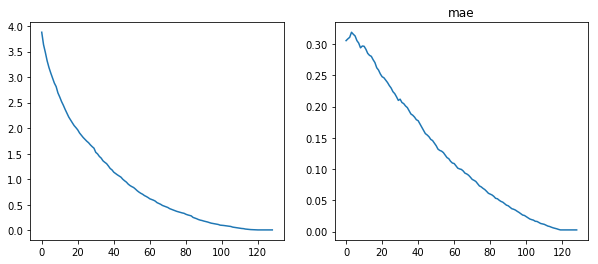

In [49]:
plot_rmse =[]
plot_mae =[]
for x in range(1,130):
    u, s, vt = svds(sum_matrix, k = x)
    s_diag_matrix=np.diag(s)
    X_pred = np.dot(np.dot(u, s_diag_matrix), vt)
#     print('User-based CF MSE: ' + str(rmse(X_pred, sum_matrix)))
#     print('User-based CF MAE: ' + str(mean_absolute_error(X_pred, sum_matrix)))
   
    plt_rmse = [rmse(X_pred, sum_matrix)]
    plt_mae = mean_absolute_error(X_pred, sum_matrix)
    plot_rmse.append(plt_rmse)
    plot_mae.append(plt_mae)
    
plt.figure(figsize=(10,4)) 
num_K = np.array([range(1,130)])
plt.subplot(1,2,1)
# plt.plot(num_K,plt_rmse,'o',color='#0066FF')
plt.plot(plot_rmse)
plt.subplot(1,2,2)
plt.title("rmse")
plt.plot(plot_mae)
plt.title("mae")
# plt.plot(num_K, plt_mae,'o',color='#0066FF')
plt.show()

In [52]:
u, s, vt = svds(sum_matrix, k = 100)
s_diag_matrix=np.diag(s)
X_pred = np.dot(np.dot(u, s_diag_matrix), vt)
print('MSE: ' + str(rmse(X_pred, sum_matrix)))
print('MAE: ' + str(mean_absolute_error(X_pred, sum_matrix)))

MSE: 0.10203561259431596
MAE: 0.025871623


In [53]:
X_pred = np.dot(np.dot(u, s_diag_matrix), vt)

print('MSE: ' + str(rmse(X_pred, sum_matrix)))

print('MAE: ' + str(mean_absolute_error(X_pred, sum_matrix)))

MSE: 0.10203561259431596
MAE: 0.025871623


# nmf

In [54]:
def matrix_factorization(R, P, Q, K, steps=5000, alpha=0.0002, beta=0.02):
    Q = Q.T
    for step in range(steps):
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    eij = R[i][j] - np.dot(P[i,:],Q[:,j])
                    for k in range(K):
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])
        eR = np.dot(P,Q)
        e = 0
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    e = e + pow(R[i][j] - np.dot(P[i,:],Q[:,j]), 2)
                    for k in range(K):
                        e = e + (beta/2) * ( pow(P[i][k],2) + pow(Q[k][j],2) )
        if e < 0.001:
            break
    return P, Q.T

In [55]:
from sklearn.decomposition import NMF , ProjectedGradientNMF
R = sum_matrix
R = np.array(R)
nmf = NMF()
W = nmf.fit_transform(R);
H = nmf.components_;
nR = np.dot(W,H)
print (nR)

[[0.         0.         0.         ... 0.05653244 0.00930617 0.        ]
 [0.         0.         0.         ... 2.31357751 0.2753807  0.        ]
 [0.         0.         0.         ... 0.04202194 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.030018   0.         0.        ]
 [0.         0.         0.         ... 0.15608845 0.         0.        ]
 [0.         0.         0.         ... 0.27524333 0.         0.        ]]


In [56]:
pd.DataFrame(W)

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,129
0,0.016636,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.595036,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000
1,3.320120,2.279263e+00,0.000000,0.000000,0.000000,2.541559,0.253660,0.000000e+00,0.000000,0.000000,...,1.695794,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000
2,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.991414,0.000000,0.000000e+00,0.000000,0.000000,...,1.117400,0.000000,0.000000e+00,0.518511,0.002182,0.000000,0.000000,0.000000e+00,0.0,0.589321
3,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,2.711328e-01,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000
4,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,1.724643,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000
5,0.001985,0.000000e+00,0.000000,0.000000,0.000000,0.002145,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000016
6,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.185386,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000167,0.000000e+00,0.0,0.000000
7,0.000000,5.087371e-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,1.444471e-08,0.000000,0.002552,0.000000,0.000000,0.000000e+00,0.0,0.000000
8,0.000000,2.587876e+00,0.048742,0.000000,0.000000,2.514401,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000
9,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000003,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000027


In [57]:
pd.DataFrame(H)

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,129
0,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.611460,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.00000,0.00000,0.000000,0.015975,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,...,0.000000e+00,8.879624e-04,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.366064,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000661,0.000000,0.000000
6,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,1.878795,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,...,0.000000e+00,6.207663e-01,0.000000e+00,0.531233,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,...,0.000000e+00,5.603743e-01,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.907070,0.000000


In [58]:
pd.DataFrame(nR)

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,129
0,0.000000e+00,0.000000,0.000000e+00,3.551440e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,6.199488e-03,2.893055e-12,1.989708e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.653244e-02,9.306175e-03,0.000000e+00
1,0.000000e+00,0.000000,0.000000e+00,1.290350e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,5.733440e-01,0.000000e+00,2.997827e+00,3.062806e-02,0.000000e+00,0.000000e+00,2.313578e+00,2.753807e-01,0.000000e+00
2,0.000000e+00,0.000000,0.000000e+00,6.567681e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.998729e+00,1.208318e-03,0.000000e+00,1.114049e-03,8.659918e-02,0.000000e+00,0.000000e+00,4.202194e-02,0.000000e+00,0.000000e+00
3,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,3.032631e-04,6.050984e-04,9.167205e-04,2.852533e-03,0.000000e+00,0.000000e+00,6.021489e+00,2.011538e-04,0.000000e+00
4,0.000000e+00,0.000000,0.000000e+00,5.704456e-05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.653048e-07,4.853818e-01,0.000000e+00,1.469379e-02,0.000000e+00,0.000000e+00,0.000000e+00,3.320392e-01,5.258401e-02,0.000000e+00
5,0.000000e+00,0.000000,0.000000e+00,2.019816e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.389091e-03,2.438316e-03,2.673581e-13,7.183690e-03,8.449931e-03,0.000000e+00,0.000000e+00,5.094810e-04,1.365264e-06,0.000000e+00
6,0.000000e+00,0.000000,0.000000e+00,3.001504e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,2.048933e-04,0.000000e+00,2.994180e+00,4.364394e-04,0.000000e+00,0.000000e+00,6.787121e-02,3.023973e+00,0.000000e+00
7,0.000000e+00,0.000000,6.427678e-298,1.927376e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.358989e-300,...,0.000000e+00,0.000000e+00,4.654143e-03,1.698875e-03,0.000000e+00,2.262882e-301,1.255754e-296,7.662882e-09,1.989002e+00,0.000000e+00
8,0.000000e+00,0.000000,0.000000e+00,7.351981e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.262349e-02,4.351996e-02,0.000000e+00,1.368124e-01,0.000000e+00,0.000000e+00,0.000000e+00,2.481430e-01,0.000000e+00,0.000000e+00
9,0.000000e+00,0.000000,0.000000e+00,4.651254e-06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.047951e-09,0.000000e+00,0.000000e+00,4.117828e-09,4.544056e-07,0.000000e+00,0.000000e+00,0.000000e+00,3.045530e-06,0.000000e+00


In [63]:
print('RMSE: ' + str(rmse(nR, sum_matrix)))
print('MAE: ' + str(mean_absolute_error(nR, sum_matrix)))

RMSE: 0.22881680219147243
MAE: 0.012896735473564045
